<div align="center"> 
<img src='./img/header.png'/>
</div>

## [Global Ice Velocities](https://its-live.jpl.nasa.gov/)
    
The Inter-mission Time Series of Land Ice Velocity and Elevation (ITS_LIVE) project facilitates ice sheet, ice shelf and glacier research by providing a globally comprehensive and temporally dense multi-sensor record of land ice velocity and elevation with low latency.

Scene-pair velocities generated from satellite optical and radar imagery.

* Coverage: All land ice
* Date range: 1985-present
* Resolution: 240m
* Scene-pair separation: 6 to 546 days


---

* If you want to query our API directly using  your own software here is the OpenApi endpoint https://staging.nsidc.org/apps/itslive-search/docs
* For questions about this notebook and the dataset please contact users services at uso@nsidc.org


## Build a cube

This notebook demonstrates a prototype for the _ITSCube_ class to generate time series of velocity pair granules for the polygon of interest. 

For now ITSCube loads granules, as downloaded by the _itslive.ipynb_ notebook, from provided data directory. It uses centroid coordinates and offset in meters as parameters to ITSCube.create() method to define a polygon of interest. Centroid coordinates for the region are computed by the _itslive.ipynb_ notebook as well.

The following OpenApi parameters were used to download the granules:

> params = {'polygon': '-15.7356,81.2047,-15.7356,81.2067,-15.7336,81.2067,-15.7336,81.2047,-15.7356,81.2047', 'start': '2010-01-05', 'end': '2020-01-01', 'percent_valid_pixels': 1}

---

### ITSCube TODO
 * Polygon coordinates should be provided to the ITSCube class instance, which will interact with OpenApi to download granules for the polygon.
 * Should convert all granules to the most occuring projection for the cube (x, y, v (?))
 * Should handle multiple granules for the same "middle date": pick the granule which has data in the target projection

In [14]:
# Auto-reload all modules to pick up latest edits to dependent modules
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%time
from itscube import ITSCube

cube = ITSCube(data_dir='cube_data')

# Hard-coded centroid to correspond to already downloaded data files in 'cube_data' dir
centroid = [-15.734577, 81.205687]

# Use square of 24km 
mean_offset_meters = 120000 
centroid_projections = cube.create(centroid, mean_offset_meters)
list(cube.velocities.keys()), centroid_projections.keys()

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


([datetime.datetime(2016, 11, 20, 0, 0),
  datetime.datetime(2013, 8, 3, 0, 0),
  datetime.datetime(2013, 5, 16, 0, 0),
  datetime.datetime(2013, 8, 27, 0, 0),
  datetime.datetime(2016, 12, 23, 0, 0),
  datetime.datetime(2011, 6, 23, 0, 0),
  datetime.datetime(2017, 12, 16, 0, 0),
  datetime.datetime(2017, 12, 15, 0, 0),
  datetime.datetime(2011, 7, 8, 0, 0),
  datetime.datetime(2011, 7, 7, 0, 0),
  datetime.datetime(2016, 10, 11, 0, 0),
  datetime.datetime(2016, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 16, 0, 0),
  datetime.datetime(2013, 5, 8, 0, 0),
  datetime.datetime(2015, 2, 12, 0, 0),
  datetime.datetime(2011, 7, 4, 0, 0),
  datetime.datetime(2015, 6, 8, 0, 0),
  datetime.datetime(2013, 4, 11, 0, 0),
  datetime.datetime(2017, 11, 15, 0, 0),
  datetime.datetime(2017, 12, 23, 0, 0),
  datetime.datetime(2016, 12, 6, 0, 0),
  datetime.datetime(2014, 12, 14, 0, 0),
  datetime.datetime(2015, 1, 23, 0, 0)],
 {32628.0: (487462.22497615207, 9016243.037587738),
  32627.0: (589752.13415

In [39]:
# cube.layers

### Examine random cube layer

In [17]:
import datetime

# Examine one of the layers
first_date = list(cube.velocities.keys())[0]
first_layer = cube.velocities[first_date]
first_layer

<xarray.DataArray 'v' (y: 721, x: 626)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x         (x) float64 3.913e+05 3.916e+05 3.918e+05 ... 5.411e+05 5.413e+05
  * y         (y) float64 9.085e+06 9.085e+06 9.084e+06 ... 8.912e+06 8.912e+06
    mid_date  datetime64[ns] 2016-11-20
Attributes:
    units:                m/y
    standard_name:        velocity
    map_scale_corrected:  0
    best_practice:        velocities should always be merged/averaged using c...
    grid_mapping:         UTM_Projection
    projection:           32628.0

In [18]:
first_layer.attrs['projection']

'32628.0'

In [19]:
first_layer.x

<xarray.DataArray 'x' (x: 626)>
array([391312.5, 391552.5, 391792.5, ..., 540832.5, 541072.5, 541312.5])
Coordinates:
  * x         (x) float64 3.913e+05 3.916e+05 3.918e+05 ... 5.411e+05 5.413e+05
    mid_date  datetime64[ns] 2016-11-20
Attributes:
    units:          m
    standard_name:  projection_x_coordinate
    long_name:      x coordinate of projection

In [20]:
first_layer.attrs

{'units': 'm/y',
 'standard_name': 'velocity',
 'map_scale_corrected': 0,
 'best_practice': 'velocities should always be merged/averaged using component velocities to prevent high velocity magnitude bias',
 'grid_mapping': 'UTM_Projection',
 'projection': '32628.0'}

### Display cube layers

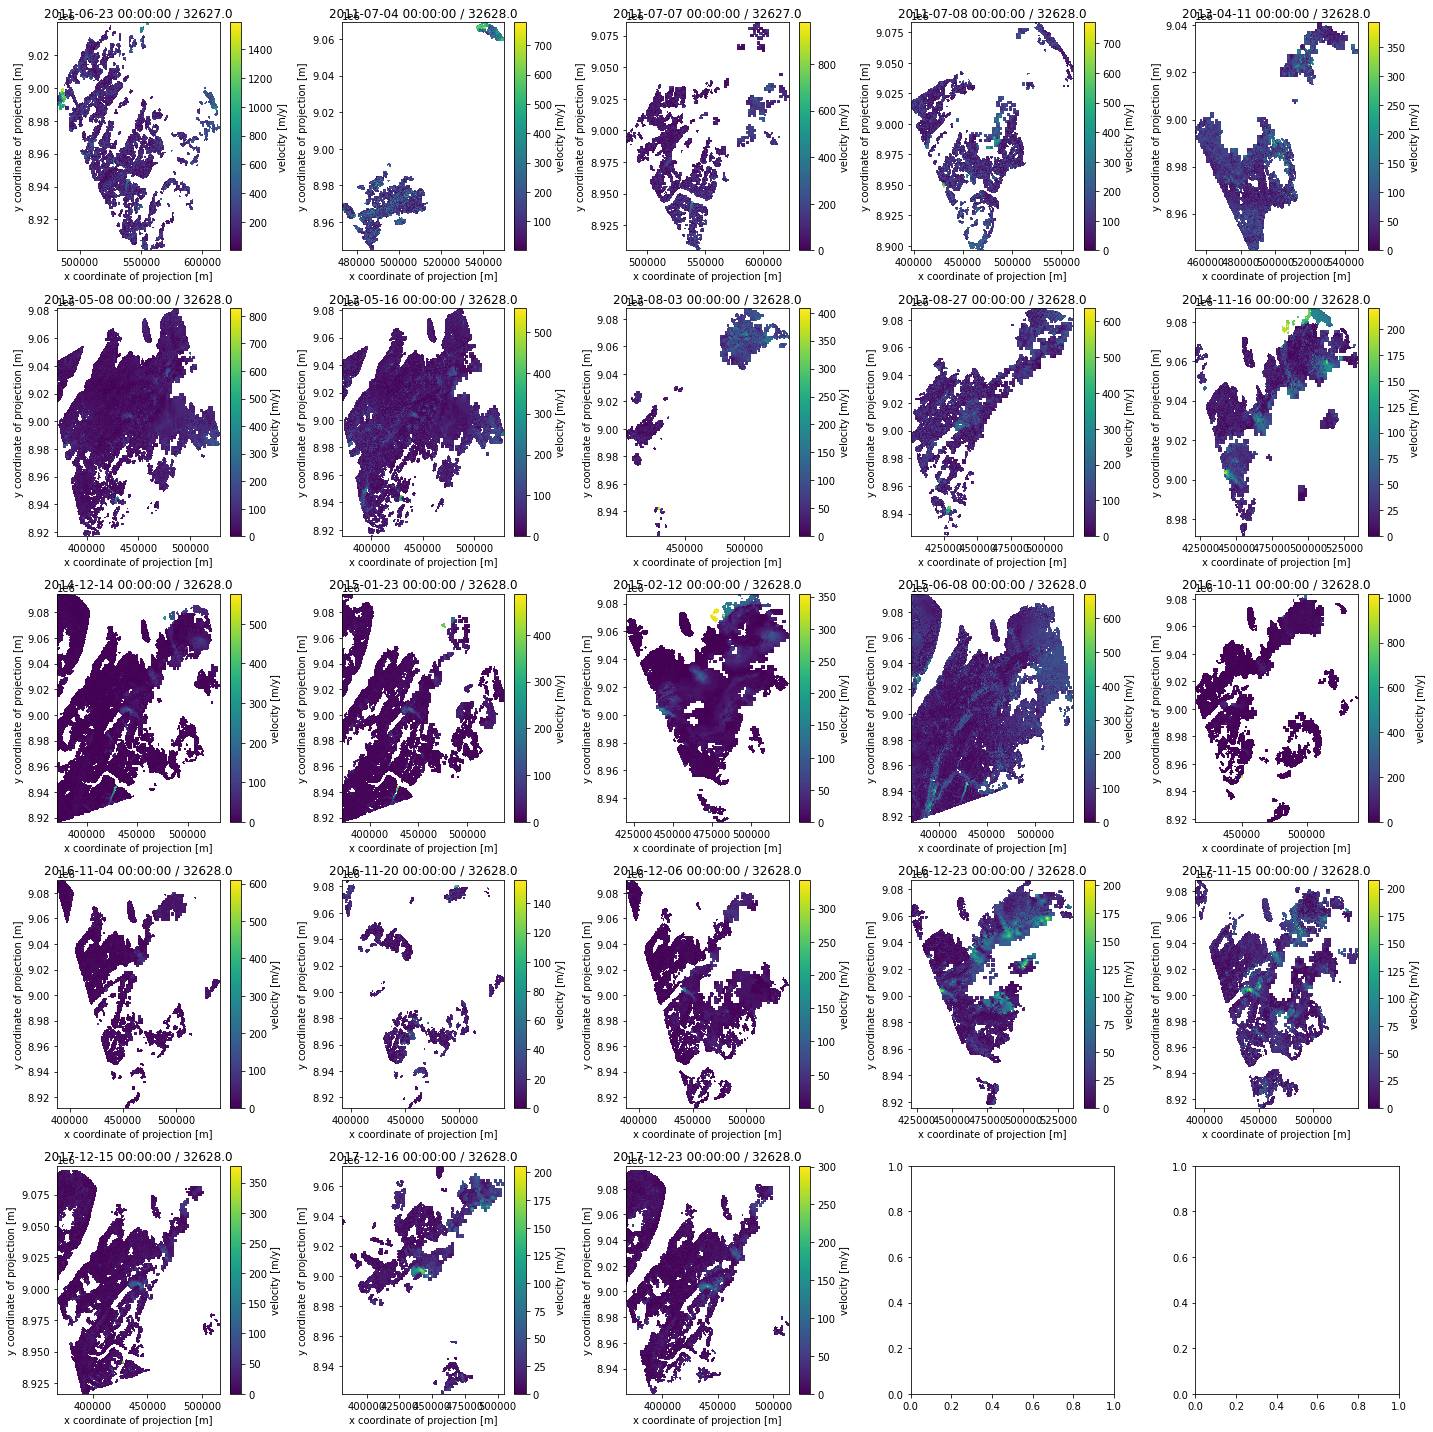

In [41]:
cube.plot_layers()

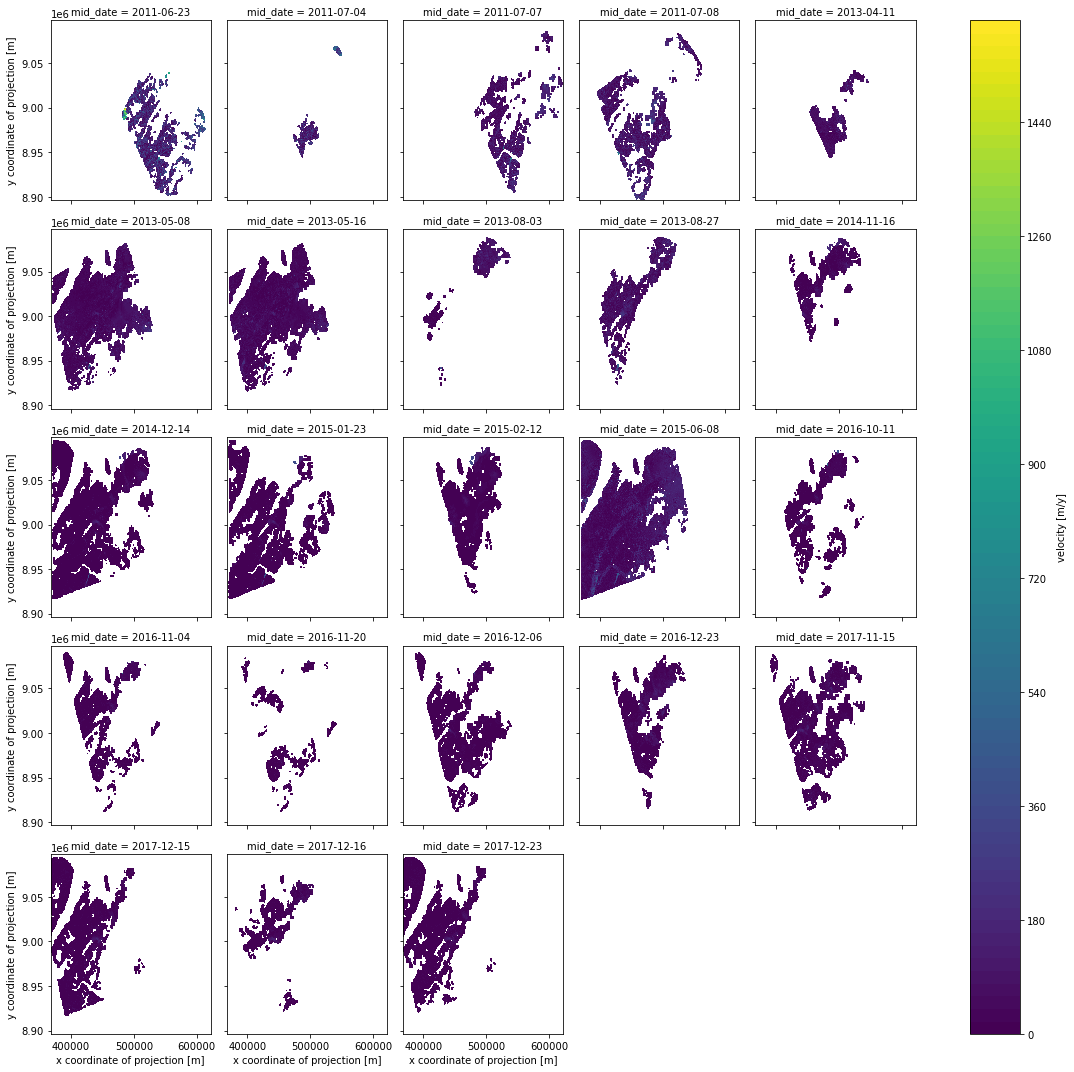

In [38]:
cube.plot()